# Project 2

<a id = 'table-of-contents'></a>
# Table of Contents
- [1 Introduction](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Data Source Location](#1.2)
    - [1.5 Notebook Flow](#1.3)
- [2 Preparations](#2)
    - [2.1 Importing Packages](#2.1)
    - [2.2 Version Control](#2.2)
    - [2.3 Loading the dataset](#2.3)
- [3 Hypothesis Generation](#3)
- [4 Getting Basic Understanding of The Data](#4)
    - [4.1 Seeing the data and shape](#4.1)
    - [4.2 Data Statistics](#4.2)
    - [4.3 Number of Unique Values in Each Column](#4.3)
    - [4.4 Distribution of Target Variable](#4.4)
    - [4.5 Observations](#4.5)
- [5 Univariate Analysis](#5)
    - [5.1 Pie plots for categorical variables](#5.1)
    - [5.2 Count plots for categorical variables](#5.2)
    - [5.3 Univariate Analysis Observations](#5.3)
- [6 Bivariate Analysis](#6)
    - [6.1 Bivariate Analysis For Categorical Variables](#6.1)
    - [6.2 Bivariate Analysis For Numerical Variables](#6.2)
    - [6.3 Correlation Plot](#6.3)    
- [7. Hypothesis testing](#7)
- [8. Feature Importance Using ML](#8)

---
<a id='1'></a>
# Introduction


<a id='1.1'></a>
### 1.1 Problem Statement

About Dataset and problem:
The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 



<a id='1.2'></a>
### 1.2 Data Source Location
**https://machinehack.com/hackathons/analytics_olympiad_2022/data**
[I am only using the train set for analysis]

<a id = '1.3'></a>
### 1.3 Notebook Flow

Following will be the flow of this notebook
- Hypothesis Generation
- Getting Basic Understanding of the Dataset
- Univariate Analysis
- BiVariate Analysis
- Hypothesis Testing
- Feature Importance Using ML

---
<a id = '2'></a>
# 2. Preparations

<a id = '2.1'></a>
### 2.1 Importing Packages

In [1]:
from platform import python_version
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

<a id = '2.2'></a>
### 2.2 Version Control

In [2]:
print(f'python version: {python_version()}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')

python version: 3.9.7
pandas version: 1.3.4
matplotlib version: 3.4.3
seaborn version: 0.11.2


<a id = '2.3'></a>
### 2.3 Loading The Dataset

In [3]:
data = pd.read_csv("train.csv")

---
<a id='3'></a>
# 3. Hypothesis Generation

1. More The Number Of Accidents More The Rejection Rate
2. Customers With 0 DUIS Has Less Rejection Rate
3. More The Credit Score, Less The Rejection Rate

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

---
<a id='4'></a>
# 4. Getting Basic Understanding of The Data
[back to top](#table-of-contents)
<a id="table-of-contents"></a>

<a id='4.1'></a>

### 4.1 Seeing the Data and Shape

In [4]:
data.head() # printing forst 5 rows of the dataset

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [5]:
print(f"The given dataset has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"The Dataset has {len(data.columns) - 1} features and 1 target variable: {data.columns[-1]}")

target = 'OUTCOME'

The given dataset has 105000 rows and 18 columns
The Dataset has 17 features and 1 target variable: TYPE_OF_VEHICLE


<a id='4.2'></a>
### 4.2 Data Statistics

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Eliminating 'e' (scientific) notation for very large numeric values

In [7]:
data.describe().T # Basic statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
ID,105000.000,394931.296,279694.106,101.000,156351.750,354679.500,598602.250,999976.000
CREDIT_SCORE,105000.000,0.602,0.138,0.067,0.515,0.601,0.703,0.954
VEHICLE_OWNERSHIP,105000.000,0.827,0.378,0.000,1.000,1.000,1.000,1.000
MARRIED,105000.000,0.584,0.493,0.000,0.000,1.000,1.000,1.000
CHILDREN,105000.000,0.520,0.500,0.000,0.000,1.000,1.000,1.000
POSTAL_CODE,105000.000,18045.439,16709.040,10238.000,10238.000,10238.000,22957.750,92101.000
ANNUAL_MILEAGE,105000.000,11061.229,2972.355,2000.000,9000.000,11000.000,13000.000,21000.000
SPEEDING_VIOLATIONS,105000.000,0.676,1.384,0.000,0.000,0.000,1.000,20.000
DUIS,105000.000,0.130,0.590,0.000,0.000,0.000,0.000,6.000
PAST_ACCIDENTS,105000.000,0.549,1.403,0.000,0.000,0.000,0.000,15.000


<a id='4.3'></a>
### 4.3 Number of Unique Values In Each Column

In [8]:
pd.DataFrame(data.nunique(), columns=['No. of Unique Values']).sort_values(by = 'No. of Unique Values') # Getting number of unique values in each column

,No. of Unique Values
VEHICLE_YEAR,2
CHILDREN,2
GENDER,2
MARRIED,2
OUTCOME,2
VEHICLE_OWNERSHIP,2
EDUCATION,3
TYPE_OF_VEHICLE,4
INCOME,4
DRIVING_EXPERIENCE,4


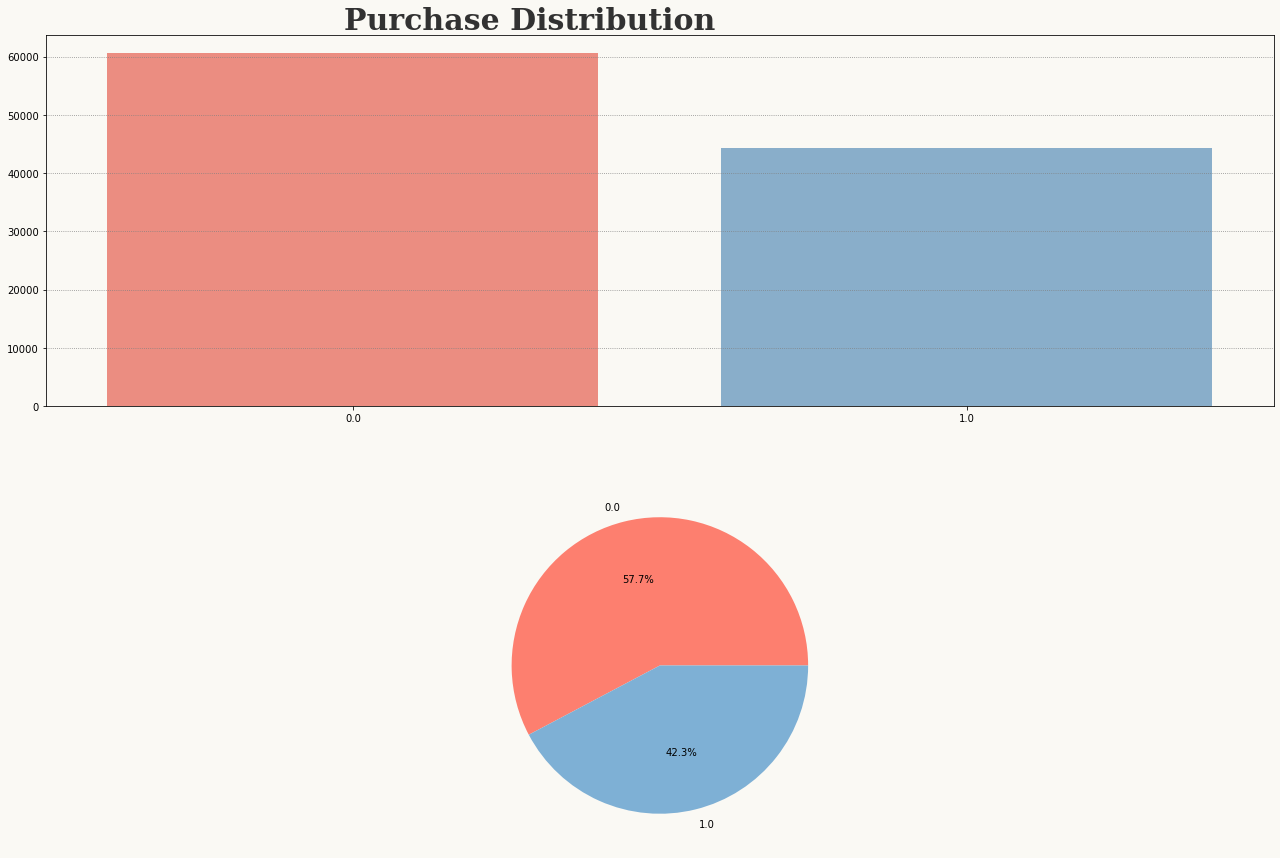

In [9]:
fig = plt.figure(figsize = (22, 15)) # Setting the figure size
gs = fig.add_gridspec(2, 1) # Creating 2 subplots inside the figure

background_color = "#faf9f4" # Storing the background color
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"] # Storing the color palette

fig.patch.set_facecolor(background_color) # setting facecolor for the graph

# Fig 1 ---> Here I am overlapping kdeplot and histplot to show the distribution of target variable

ax0 = fig.add_subplot(gs[0, 0]) # Selecting the subplot for first figure
ax0.set_facecolor(background_color) # Setting the facecolor

ax0.grid(color='gray', linestyle=':', axis='y') # Setting the grid style
sns.countplot(data = data, x = target, ax = ax0, palette=colors) # plotting the kdeplot


ax0.set_xlabel("") # Setting xlable as None
ax0.set_ylabel("") # Setting ylable as None


# Fig 2
ax1 = fig.add_subplot(gs[1, 0]) # Selecting the subplot for second figure
ax1.set_facecolor(background_color) # Setting the facecolor

data[target].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax1, colors = colors) # plotting the boxplot
ax1.set_xlabel("")# Setting xlable as None
ax1.set_ylabel("")# Setting ylable as None

_ = plt.title('Purchase Distribution',fontsize=30, y = 2.2, x = 0.15, fontweight='bold', fontfamily='serif', color="#323232") # Setting the title for the entire plot

<a id='4.5'></a>
### 4.5 Observations

- There are 105000 rows and 18 columns
- Insurance reimbursement rejection rate is 57.7% 
- There are no missing values in the dataset.


---
<a id = '5'></a>
# 5. Univariate Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

<a id = '5.1'></a>
### 5.1 Pie plots for categorical variables

In [10]:
columns = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'TYPE_OF_VEHICLE']

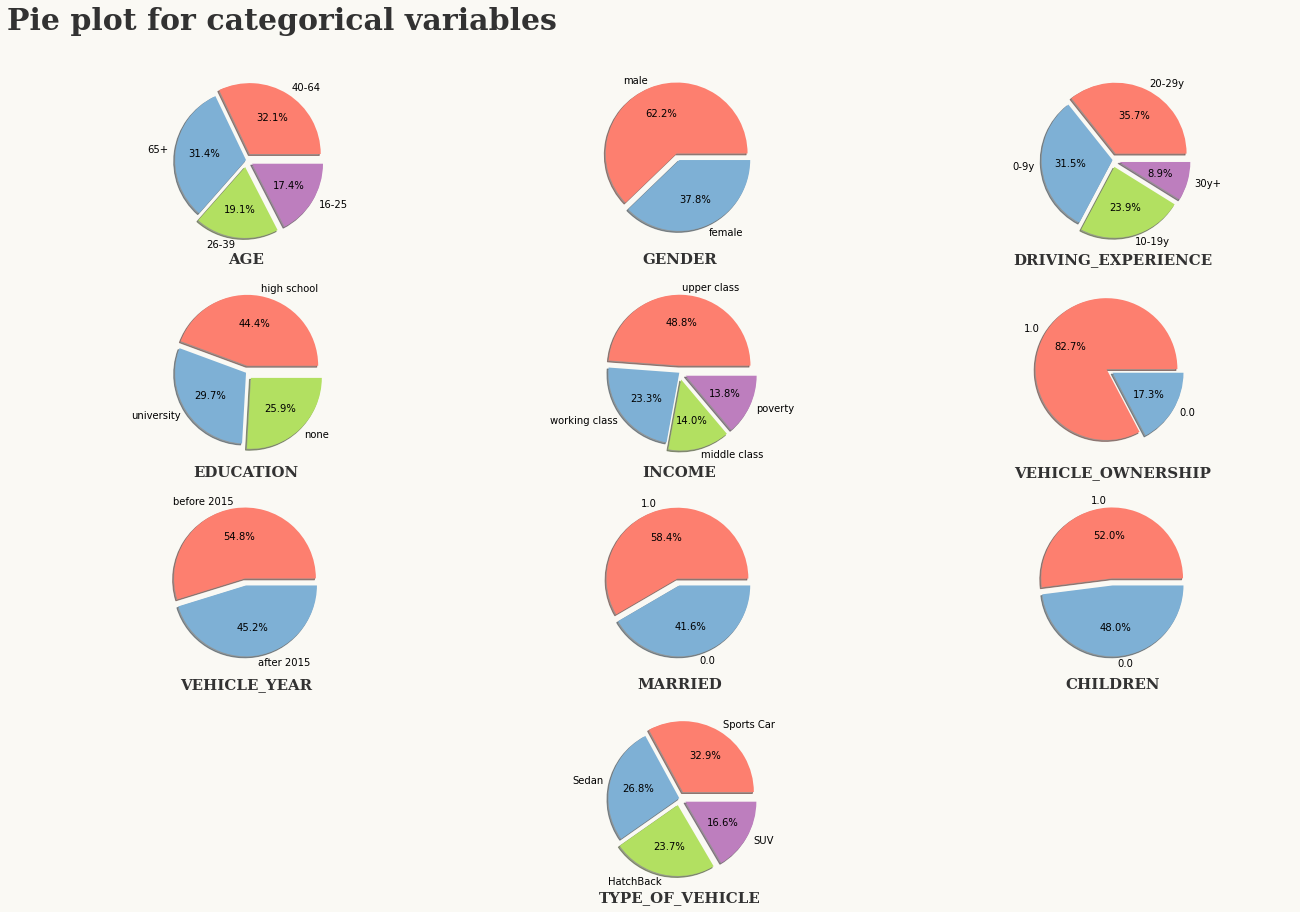

In [11]:
fig = plt.figure(figsize = (22, 15))# Setting the figure size
gs = fig.add_gridspec(4, 3) # Creating 9 subplots inside the figure

fig.patch.set_facecolor(background_color) # setting facecolor for the graph

# Storing each subplot in respective variable
ax0 = fig.add_subplot(gs[0, 0]) 
ax1 = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[0, 2]) 
ax3 = fig.add_subplot(gs[1, 0]) 
ax4 = fig.add_subplot(gs[1, 1]) 
ax5 = fig.add_subplot(gs[1, 2]) 
ax6 = fig.add_subplot(gs[2, 0]) 
ax7 = fig.add_subplot(gs[2, 1]) 
ax8 = fig.add_subplot(gs[2, 2]) 
ax9 = fig.add_subplot(gs[3, 0]) 
ax10 = fig.add_subplot(gs[3, 1]) 
ax11 = fig.add_subplot(gs[3, 2]) 

for s in ["right", "top", "left", "bottom"]:
    ax9.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
ax9.set_facecolor(background_color)
ax11.set_facecolor(background_color)

ax9.axes.get_xaxis().set_visible(False)
ax9.axes.get_yaxis().set_visible(False)
ax11.axes.get_yaxis().set_visible(False)
ax11.axes.get_xaxis().set_visible(False)

    
# Following are the columns for which we will plot pie plots
columns = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'TYPE_OF_VEHICLE']
subplot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax10] # Storing the subplots in a list
explode = (0.1, 0.0, 0.1, 0.1, 0.1, 0.0) # Storing explode ratios for pie plots


# Below is the code to plot a pie plot in respectve subplot
for col, pos in zip(columns, subplot_list):# Iterating through each column and respective subplot
    pos.set_facecolor(background_color) # Setting facecolor for the subplot
    data[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = pos, shadow = True,explode=explode[:data[col].nunique()], colors = colors) # plotting the pie plot
    pos.set_xlabel(f'{col}', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232") # Setting xlable as column name
    pos.set_ylabel("") # Setting ylable as None

_ = plt.title('Pie plot for categorical variables',fontsize=30, y = 4.8, x = -1.8, fontweight='bold', fontfamily='serif', color="#323232") # Setting title for the figure

<a id = '5.2'></a>

### 5.2 count plots for Numerical variables

In [12]:
columns = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

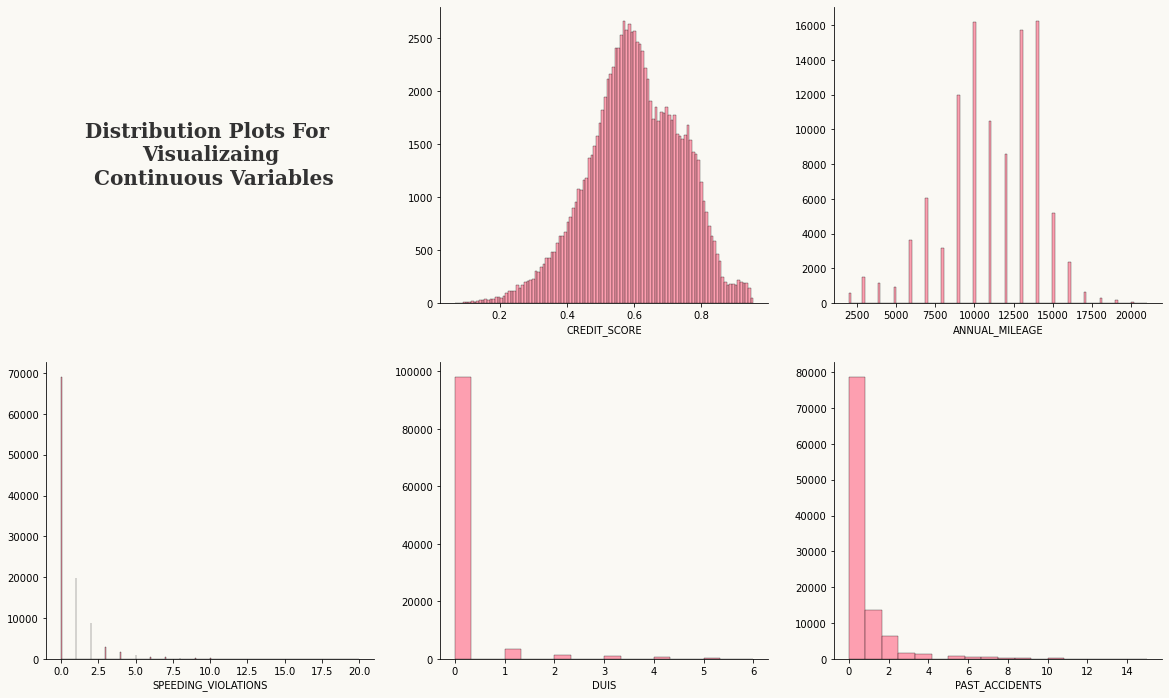

In [13]:
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color


for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

axis = { 'CREDIT_SCORE' : [ax1],
         'ANNUAL_MILEAGE' : [ax2],
         'SPEEDING_VIOLATIONS' : [ax3],
        'DUIS' : [ax4],
        'PAST_ACCIDENTS' : [ax5],
       }

ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Distribution Plots For \nVisualizaing\n Continuous Variables', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")


for col in axis.keys():
    sns.histplot(data = data, x=col, color='#ff819a', linewidth=0.3, zorder=3, ax = axis[col][0])
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel(col)

In [14]:
columns = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'TYPE_OF_VEHICLE']

<a id = 5.3></a>
### 5.3 Uni"veriate Analysis Observations

**Gender** : 
1. There are 62% Males and 38% Females.

**'Age'** :
1. 83% of the customers are above the age of 26.

**Income**:
1. Almost half of the customers belong to upper class.

**VEHICLE_OWNERSHIP** : 
1. 82 % of the custmers owns a vehicle.

**Credit_Score** : 
1. Most of the customers have credit score in between 0.5 to 0.7

**Marrigd**:
1. 58% of our customers are married.

**DUIS** : 
1. Most of the customwers have no DUIS.

**Past Accidents** : 
1. Most of the customers have no past accidents.

---
<a id = '6'></a>
# 6. Bivariate Analysis


**Here, I will demonstrate the relationship between indpendent and dependent variable.**

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = 6.1></a>
### 6.1 Bi-Variate Analysis for categorical Variables

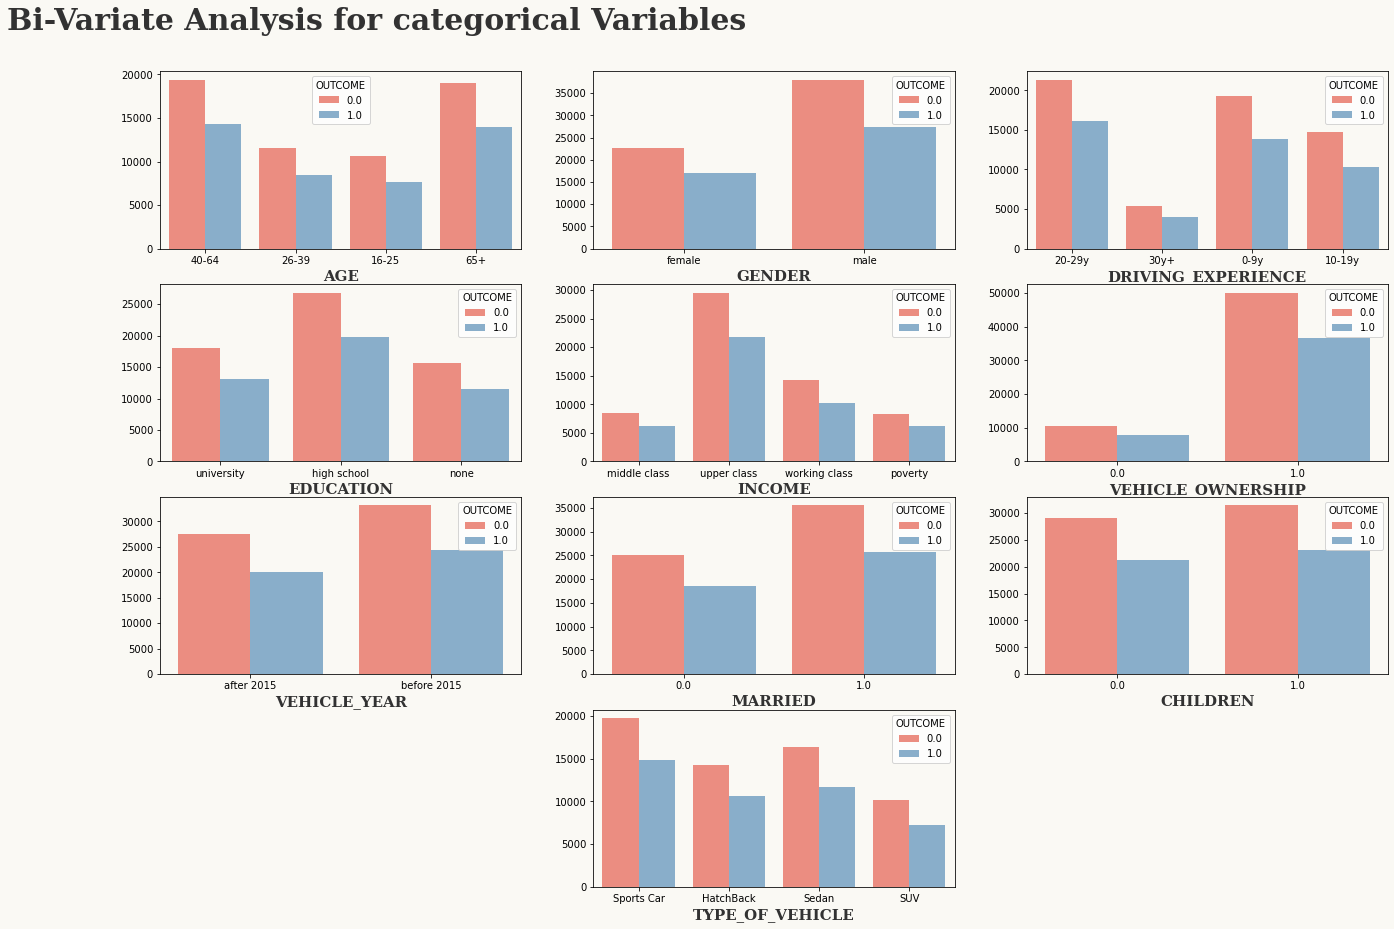

In [15]:
fig = plt.figure(figsize = (22, 15))# Setting the figure size
gs = fig.add_gridspec(4, 3) # Creating 9 subplots inside the figure

fig.patch.set_facecolor(background_color) # setting facecolor for the graph

# Storing each subplot in respective variable
ax0 = fig.add_subplot(gs[0, 0]) 
ax1 = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[0, 2]) 
ax3 = fig.add_subplot(gs[1, 0]) 
ax4 = fig.add_subplot(gs[1, 1]) 
ax5 = fig.add_subplot(gs[1, 2]) 
ax6 = fig.add_subplot(gs[2, 0]) 
ax7 = fig.add_subplot(gs[2, 1]) 
ax8 = fig.add_subplot(gs[2, 2]) 
ax9 = fig.add_subplot(gs[3, 0]) 
ax10 = fig.add_subplot(gs[3, 1]) 
ax11 = fig.add_subplot(gs[3, 2]) 

for s in ["right", "top", "left", "bottom"]:
    ax9.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
ax9.set_facecolor(background_color)
ax11.set_facecolor(background_color)

ax9.axes.get_xaxis().set_visible(False)
ax9.axes.get_yaxis().set_visible(False)
ax11.axes.get_yaxis().set_visible(False)
ax11.axes.get_xaxis().set_visible(False)

    
# Following are the columns for which we will plot pie plots
columns = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'TYPE_OF_VEHICLE']
subplot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax10] # Storing the subplots in a list
explode = (0.1, 0.0, 0.1, 0.1, 0.1, 0.0) # Storing explode ratios for pie plots


# Below is the code to plot a pie plot in respectve subplot
for col, pos in zip(columns, subplot_list):# Iterating through each column and respective subplot
    pos.set_facecolor(background_color) # Setting facecolor for the subplot
    sns.countplot(data = data, x = col, hue = target, palette = colors, ax = pos)
    pos.set_xlabel(f'{col}', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232") # Setting xlable as column name
    pos.set_ylabel("") # Setting ylable as None
    
_ = plt.title('Bi-Variate Analysis for categorical Variables',fontsize=30, y = 4.8, x = -1.8, fontweight='bold', fontfamily='serif', color="#323232") # Setting title for the figure

<a id = '6.2'></a>
### 6.2 Bivariate Analysis For Numerical Variables

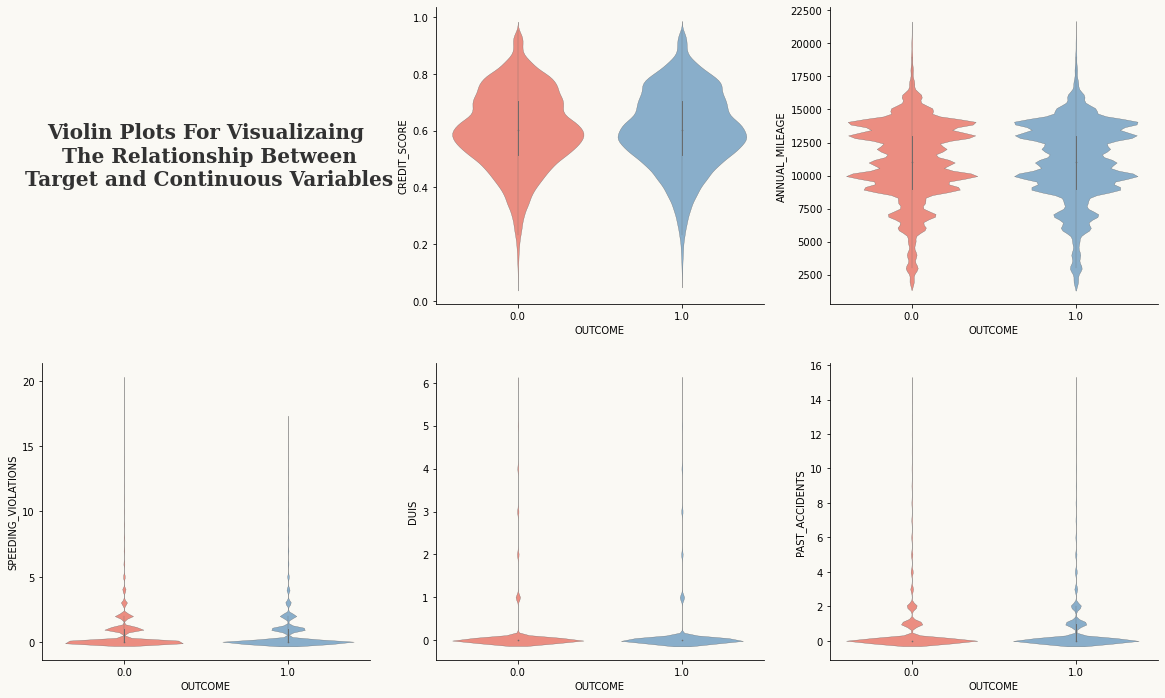

In [16]:
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color


for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

axis = { 'CREDIT_SCORE' : [ax1],
         'ANNUAL_MILEAGE' : [ax2],
         'SPEEDING_VIOLATIONS' : [ax3],
        'DUIS' : [ax4],
        'PAST_ACCIDENTS' : [ax5],
       }

ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, 'Violin Plots For Visualizaing\n The Relationship Between\n Target and Continuous Variables', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")


for col in axis.keys():
    sns.violinplot(data = data, y=col, palette=colors, linewidth=0.3, zorder=3, ax = axis[col][0], x = target)
    axis[col][0].set_ylabel(f'{col}')
    axis[col][0].set_xlabel('OUTCOME')

<a id = '6.3'></a>
### 6.3 Correlation Plot

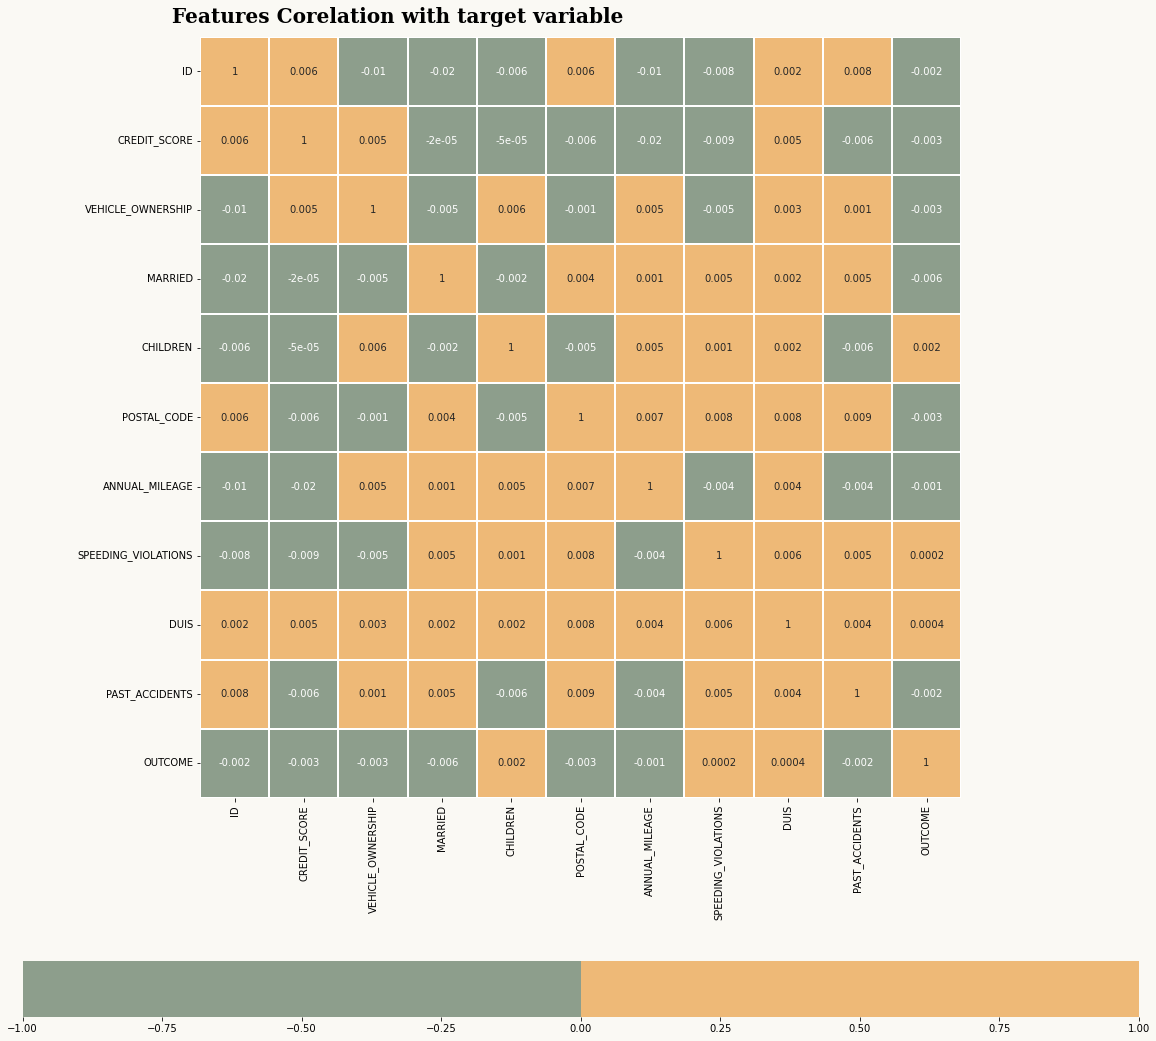

In [17]:
fig = plt.figure(figsize = (20, 20))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color
_ = ax0.set_facecolor(background_color) # axes background color

_ = ax0.text(-0.4, -0.2, 'Features Corelation with target variable',  fontsize=20, fontweight='bold', fontfamily='serif')


_ = sns.heatmap(data.corr(), ax=ax0, linewidths=.1, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=True, cmap=["#8d9e8c", "#eeb977"], fmt='.1g', )

---
<a id = '7'></a>
# 7. Hypothesis testing
[back to top](#table-of-contents)
<a id="table-of-contents"></a>



### 1. More The Number Of Accidents More The Rejection Rate
**Answer** : 

        Yes.
        
        General rejection rate is 57% and as we can see below in most of the cases where number of past accidents is more than 4, the rejection percentage is slightly higher. 

In [18]:
rejection_rate = {}
for acc in data['PAST_ACCIDENTS'].unique():
    val = 1- data[ data['PAST_ACCIDENTS'] == acc][target].mean() 
    rejection_rate[acc] = val*100

In [19]:
rejection_percentage = pd.DataFrame({'No of Accidents':rejection_rate.keys(), 'Rejection Percentage':rejection_rate.values()}).sort_values(by = 'No of Accidents').reset_index(drop=True)

In [20]:
rejection_percentage

,No of Accidents,Rejection Percentage
0,0,57.886
1,1,56.845
2,2,57.019
3,3,56.489
4,4,59.681
5,5,59.382
6,6,58.240
7,7,59.806
8,8,59.412
9,9,61.017


<AxesSubplot:xlabel='No of Accidents', ylabel='Rejection Percentage'>

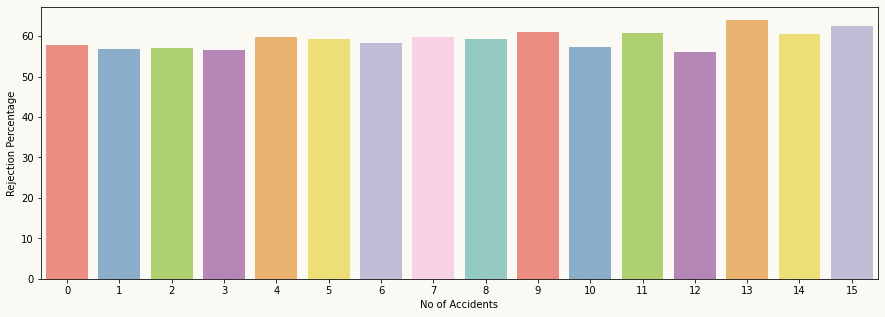

In [21]:
plt.figure(figsize = (15, 5), facecolor=background_color, ) # Setting the size and background color for figure
plt.rcParams.update({'axes.facecolor':background_color})# Setting the facecolor for figure
sns.barplot(data = rejection_percentage, x = 'No of Accidents', y = 'Rejection Percentage', palette=colors)

### 2. Customers With 0 DUIS Has Less Rejection Rate
**Answer** : 

        No.
        
        DUIS - 0 has no significant effect on the rejection rate

In [22]:
data['Is DUIS'] = data['DUIS'].apply(lambda x: 0 if x == 0 else 1)

In [23]:
duis = pd.DataFrame(data.groupby('DUIS')[target].mean() * 100)

<AxesSubplot:xlabel='DUIS', ylabel='OUTCOME'>

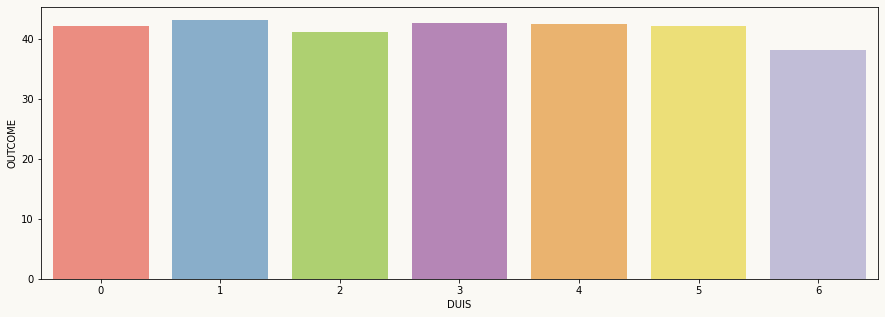

In [24]:
plt.figure(figsize = (15, 5), facecolor=background_color, ) # Setting the size and background color for figure
plt.rcParams.update({'axes.facecolor':background_color})# Setting the facecolor for figure
sns.barplot(data = duis, x = duis.index, y = target, palette=colors)

### 3. More The Credit Score, Less The Rejection Rate

**Answer** : 

        No.
        
        As we can see below, as the credit score is increasing, the rejection rate is also increasing. 

In [25]:
# Creating bins for credit score
def credit_bins(x):
    for i in range(1, 10):
        if x < (i/10):
            return i
    return 10
data['Credit_Maps'] = data['CREDIT_SCORE'].apply(lambda x: credit_bins(x))

In [26]:
credit_data = pd.DataFrame((1- data.groupby('Credit_Maps')[target].mean()) * 100 )

In [27]:
credit_data

,OUTCOME
Credit_Maps,
1,52.941
2,55.615
3,56.950
4,56.851
5,57.534
6,57.908
7,57.934
8,57.826
9,57.297


<AxesSubplot:xlabel='Credit_Maps', ylabel='OUTCOME'>

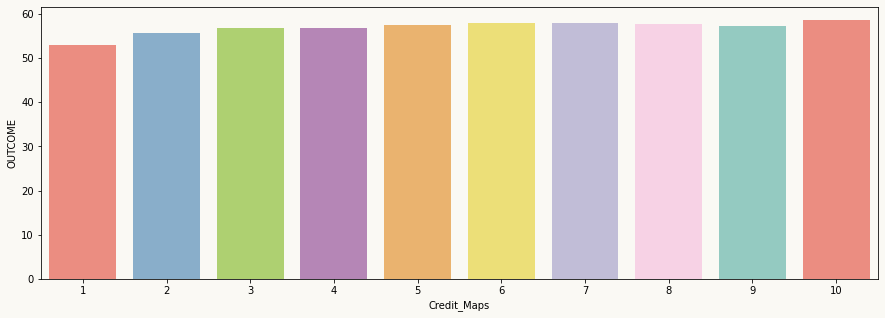

In [28]:
plt.figure(figsize = (15, 5), facecolor=background_color, ) # Setting the size and background color for figure
plt.rcParams.update({'axes.facecolor':background_color})# Setting the facecolor for figure
sns.barplot(data = credit_data, x = credit_data.index, y = target, palette=colors)

---
<a id = '8'></a>
# 8. Feature Importance Using ML

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

Here, we will try to describe the relationship between Independent(Features) and Dependent(Target) Variable using Machine Learning Modeling.

In [29]:
# Reading The Data
data = pd.read_csv("train.csv")

In [30]:
# Applying Label Encoding 
label_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE']
le = LabelEncoder()
data[label_cols] = data[label_cols].apply(le.fit_transform)

In [31]:
# Preparing Data For Machine Learning Modeling

target = 'OUTCOME'
features = [col for col in data.columns if col not in [target, 'ID']]

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size = 0.3, random_state=1999)

In [32]:
# Creating a dictionary of ML models

model_dict = {}

model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state = 1999)
model_dict['LGBM Classifier'] = LGBMClassifier(random_state = 1999)
model_dict['XGB Classifier'] = XGBClassifier(random_state = 1999, eval_metric = 'logloss')
model_dict['Catboost Classifier'] = CatBoostClassifier(random_state = 1999, verbose=False)

In [33]:
def model_evaluation(X_train, X_test, y_train, y_test, model, model_name):
    """
    Dockstring:
            Shows the score of ML Model by training and evaluating it.
            
    Parameters:
    -----------
            X_train: Training Data for ML Model
            
            X_test: Validation Data for ML Model
            
            y_train: Target values of training data
            
            y_test:  Target values of validation data
            
            model: Machine Learning Model
            
            model_name: Name of Machine Learning Model
    """
    ## Model Training and Validating
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    loss = log_loss(y_test, y_pred)
    print('======================================{}======================================='.format(model_name))
    print()
    print('Log Loss is: {}'.format(loss))
    print()
    
    # Plotting The Feature Importance
    fig = plt.figure(figsize = (12, 6))
    gs = fig.add_gridspec(1, 1)
    ax0 = fig.add_subplot(gs[0, 0])
    background_color = "#faf9f4"
    fig.patch.set_facecolor(background_color)
    ax0.set_facecolor(background_color)
    
    feature_importances = pd.DataFrame({'features' : features, 'importance' : model.feature_importances_})
    sns.barplot(data = feature_importances, x = 'importance', y = 'features', ax = ax0, color='#eeb977')
    _ = ax0.set_title(f'Feature Importance of {model_name} Model', horizontalalignment='center', verticalalignment='center',
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")

======================================Random Forest Classifier=======================================

Log Loss is: 0.7012202584644119

======================================LGBM Classifier=======================================

Log Loss is: 0.6836029099500026

======================================XGB Classifier=======================================

Log Loss is: 0.6910809059674068

======================================Catboost Classifier=======================================

Log Loss is: 0.6871943224686028



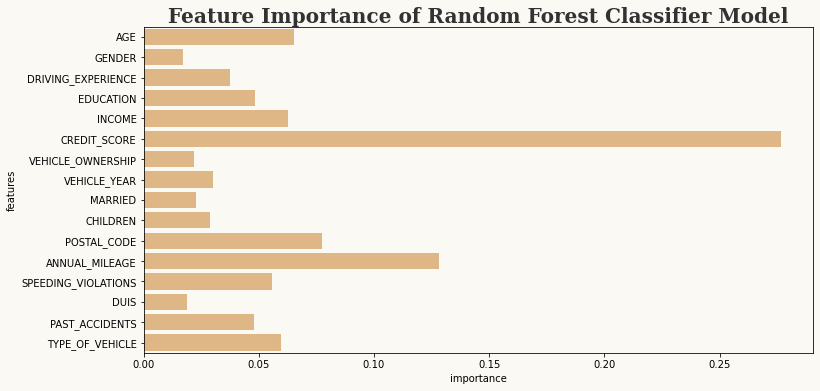

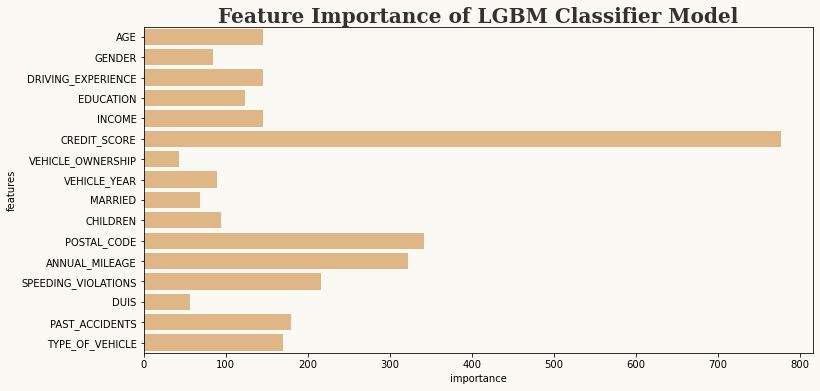

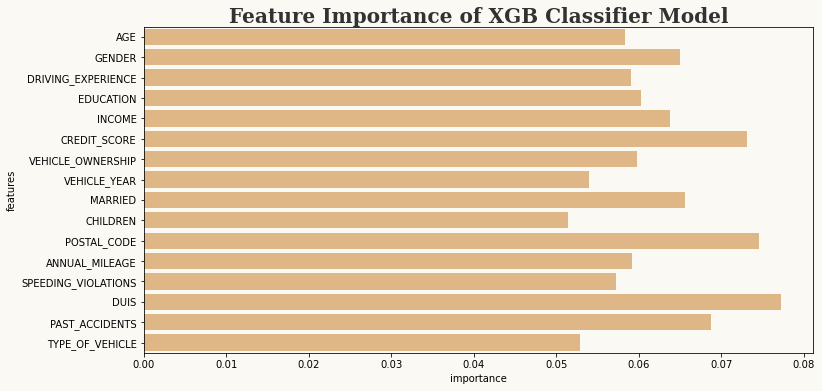

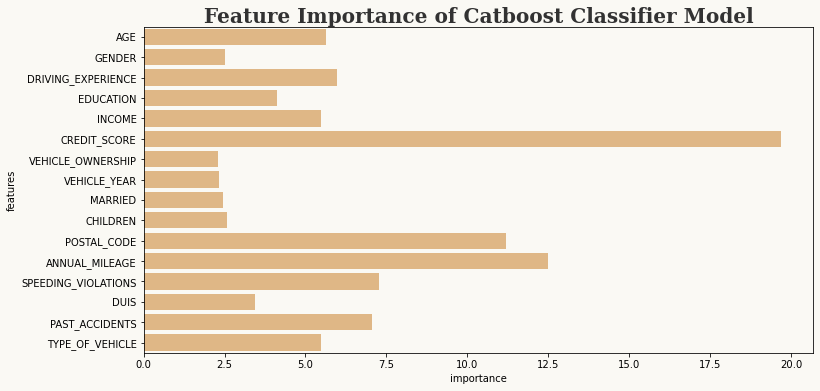

In [34]:
# Running All The Models
for model_name,model in model_dict.items():
    model_evaluation(X_train, X_test, y_train, y_test, model, model_name)

**As we can see in the graphs above, almost every ML model is giving more importance to `CREDIT_SCORE`.**